In [3]:
import gym
import numpy as np

import matplotlib.pyplot as plt
from IPython import display

env = gym.make('MountainCar-v0')
episodes = 1000
lr = 0.2
discount = 0.9
epsilon = 0.8

print(env.observation_space.high)
print(env.observation_space.low)

num_of_states_pos = 50
num_of_states_vel = 50

input_range = env.observation_space.high - env.observation_space.low 

slope_pos = num_of_states_pos / (input_range[0])
slope_vel = num_of_states_vel / (input_range[1])

num_of_actions = env.action_space.n

Q = np.random.uniform(size=[num_of_states_pos, num_of_states_vel, num_of_actions], low=-1, high=1)
print(Q.shape)



[0.6  0.07]
[-1.2  -0.07]
(50, 50, 3)


In [ ]:
def max_action(s):
    return np.argmax(Q[s[0], s[1]])


def choose_action(s, eps):
    if np.random.random() < 1 - eps:
        return np.random.randint(0, env.action_space.n)
    else:
        return max_action(s)

In [7]:
def Q_learning():
    history = []
    eps = epsilon
    
    for i in range(episodes):
        
        if i % 50 == 0:
            print(i)
            
        s = env.reset()
        s = [slope_pos, slope_vel] * (s - env.observation_space.low)
        s = s.astype(int)
        
#         eps *= 0.99
   
        reward_sum = 0
        done = False
        while not done:
            
            if i >= episodes-3:
                env.render()
            
            action = choose_action(s, eps)
            
            s_next, reward, done, info = env.step(action)
            s_next = [slope_pos, slope_vel] * (s_next - env.observation_space.low)   
            s_next = s_next.astype(int)
            
            Q[s[0], s[1], action] = (1-lr)*Q[s[0], s[1], action] + lr*(reward + discount*np.max(Q[s_next[0], s_next[1], :]))

            s = s_next
            reward_sum += reward
            
        history.append(reward_sum)
#         print(reward_sum)
        
    env.close()
    return history

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


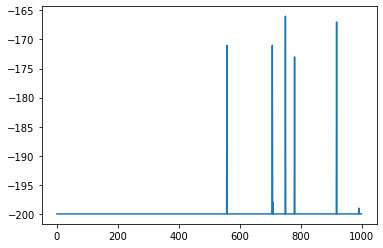

In [8]:
history = Q_learning()

plt.plot(history)
# plt.ylim(0)
plt.show()

In [9]:
def sarsa():
    history = []
    eps = epsilon
    for episodes in range(10000):
        s = env.reset()
        action = choose_action(s, eps)
#         eps *= 0.99

        done = False
        while not done:
            s_next, reward, done, info = env.step(action)

            action_next = choose_action(s_next, eps)

            Q[s, action] = (1-lr)*Q[s, action] + lr*(reward + gamma*(Q[s_next, action_next]))
            s = s_next
            action = action_next

        history.append(test_policy(1))
        
    env.close()
    return history

In [10]:
history = sarsa()

print(Q)
plt.plot(history)
plt.ylim(0)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices